In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [2]:
import dataloader
import utils
import lstm
from utils import mae, rmse

import sys
import time
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import gc

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, RepeatVector
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten, TimeDistributed

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Model Data range
date = datetime.datetime(2021,3,12)
# Total entry count
count = 1200
# Training entry count
training_count = 1000
history_size = 200

%load_ext autoreload
%autoreload 2

# Amazon

In [3]:
path = "../032721Comparison/Data/AMZN2021.csv"
# Load data
train_x, train_y, test_x, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)

(1258, 7)
(1258, 7)
(1257, 7)
(1257, 7)
(1200, 7)
(800, 200, 1)
(200, 200, 1)


In [4]:
unit_params = range(2, 60, 2)
best_config, best_err = lstm.lstm_model_selection(train_x, train_y, unit_params)
print(best_config, best_err)

2 mean val RMSE: 0.032146396599134666
4 mean val RMSE: 0.03513407953824218
6 mean val RMSE: 0.02661816174758691
8 mean val RMSE: 0.02785972256769298
10 mean val RMSE: 0.02802960554665649
12 mean val RMSE: 0.028621579840159922
14 mean val RMSE: 0.02831905775982701
16 mean val RMSE: 0.023480185662629043
18 mean val RMSE: 0.028961257859761398
20 mean val RMSE: 0.025078997515256142
22 mean val RMSE: 0.024482782321809442
24 mean val RMSE: 0.025571016970982647
26 mean val RMSE: 0.03273063264047945
28 mean val RMSE: 0.023051459380557325
30 mean val RMSE: 0.028295648597025574
32 mean val RMSE: 0.026060461200458684
34 mean val RMSE: 0.02989560733453004
36 mean val RMSE: 0.023601565911862583
38 mean val RMSE: 0.025549898699658034
40 mean val RMSE: 0.023088832679683625
42 mean val RMSE: 0.02635808945981427
44 mean val RMSE: 0.02565016151958094
46 mean val RMSE: 0.02647455749401203
48 mean val RMSE: 0.02801996369755212
50 mean val RMSE: 0.026205902546113012
52 mean val RMSE: 0.028884493261213985
5

In [5]:
model = None
gc.collect()

unit_count = best_config

model = lstm.lstm_model(test_x, unit_count)
model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)
print(model.summary())
y_hat = model.predict(test_x).transpose()[0]

del model
gc.collect()

Epoch 1/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0477
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.0034
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 9.6763e-04
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 8.9310e-04
Epoch 8/100
25/25 [==============================] - 0s 8ms/step - loss: 8.0924e-04
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss: 7.5067e-04
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - loss: 6.8199e-04
Epoch 11/100
25/25 [==============================] - 0s 15ms/step - loss: 6.8835e-04
Epoch 12/100
25/25 [==============================] - 0s 16ms/step - loss: 6.1887e-04
Epoch

17608

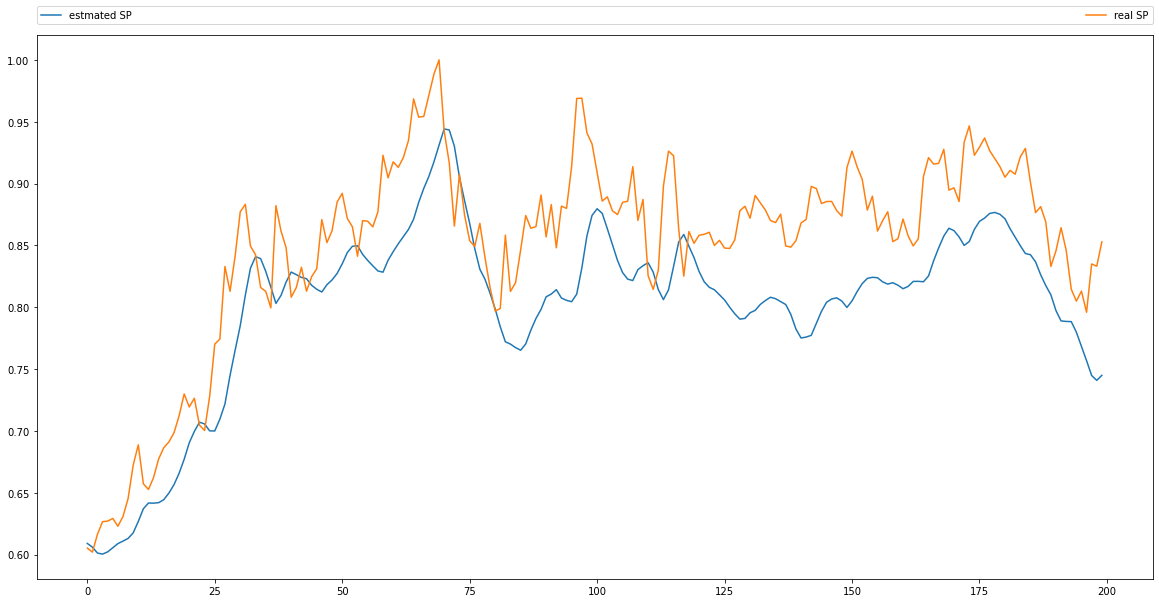

In [6]:
plt.plot(y_hat[:], label="estmated SP")
plt.plot(test_y[:], label="real SP")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [7]:
print("MAE:  ", mae(y_hat, test_y))
print("RMSE: ", rmse(y_hat, test_y))

MAE:   0.05192995252030528
RMSE:  0.06038859316006446


# SONY

In [8]:
path = "../032721Comparison/Data/SONY2021.csv"
# Load data
train_x, train_y, test_x, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)

(1258, 7)
(1258, 7)
(1257, 7)
(1257, 7)
(1200, 7)
(800, 200, 1)
(200, 200, 1)


In [9]:
unit_params = range(2, 60, 2)
best_config, best_err = lstm.lstm_model_selection(train_x, train_y, unit_params)
print(best_config, best_err)

2 mean val RMSE: 0.034932185204800605
4 mean val RMSE: 0.02599111289140635
6 mean val RMSE: 0.024035296199864453
8 mean val RMSE: 0.025079217116919704
10 mean val RMSE: 0.02191506255573309
12 mean val RMSE: 0.02372119756540753
14 mean val RMSE: 0.022419777204014883
16 mean val RMSE: 0.03194716546650629
18 mean val RMSE: 0.028526059071545824
20 mean val RMSE: 0.023606415698953664
22 mean val RMSE: 0.02374347727648802
24 mean val RMSE: 0.021735948123615227
26 mean val RMSE: 0.02128494276852741
28 mean val RMSE: 0.022136895583505206
30 mean val RMSE: 0.022328524187000643
32 mean val RMSE: 0.025620173535853347
34 mean val RMSE: 0.021757642761961137
36 mean val RMSE: 0.02371907656200147
38 mean val RMSE: 0.024202863425067028
40 mean val RMSE: 0.0237986788172316
42 mean val RMSE: 0.02128166422089741
44 mean val RMSE: 0.023618598315528656
46 mean val RMSE: 0.024395941921642173
48 mean val RMSE: 0.022428202159921962
50 mean val RMSE: 0.02114389688920268
52 mean val RMSE: 0.020747473529105588
5

In [10]:
model = None
gc.collect()

unit_count = best_config

model = lstm.lstm_model(test_x, unit_count)
model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)
print(model.summary())
y_hat = model.predict(test_x).transpose()[0]

del model
gc.collect()

Epoch 1/100
25/25 [==============================] - 0s 9ms/step - loss: 0.2224
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 8.6776e-04
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 8.0741e-04
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 7.5581e-04
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 7.3045e-04
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - loss: 6.6196e-04
Epoch 11/100
25/25 [==============================] - 0s 9ms/step - loss: 6.2254e-04
Epoch 12/100
25/25 [==============================] - 0s 9ms/step - loss: 6.0264e-04
Epoch 13/

17652

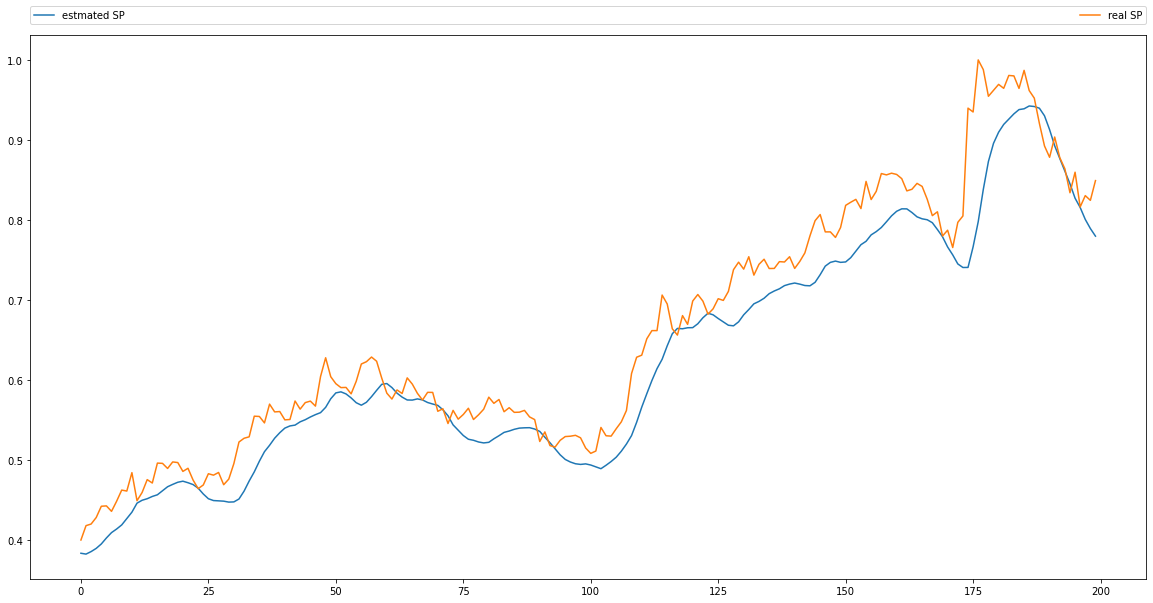

In [11]:
plt.plot(y_hat[:], label="estmated SP")
plt.plot(test_y[:], label="real SP")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [12]:
print("MAE:  ", mae(y_hat, test_y))
print("RMSE: ", rmse(y_hat, test_y))

MAE:   0.03576997202364549
RMSE:  0.046110632305994416


# IBIO

In [13]:
path = "../032721Comparison/Data/IBIO2021.csv"
# Load data
train_x, train_y, test_x, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)

(1258, 7)
(1258, 7)
(1257, 7)
(1257, 7)
(1200, 7)
(800, 200, 1)
(200, 200, 1)


In [14]:
unit_params = range(2, 60, 2)
best_config, best_err = lstm.lstm_model_selection(train_x, train_y, unit_params)
print(best_config, best_err)

2 mean val RMSE: 0.05347121645427081
4 mean val RMSE: 0.03758533277783495
6 mean val RMSE: 0.0287633813977263
8 mean val RMSE: 0.02888804505375283
10 mean val RMSE: 0.03213807113176273
12 mean val RMSE: 0.029989439844395123
14 mean val RMSE: 0.040465105824701926
16 mean val RMSE: 0.03823429463028011
18 mean val RMSE: 0.03096460116646487
20 mean val RMSE: 0.03342453318456205
22 mean val RMSE: 0.03986041925403751
24 mean val RMSE: 0.037924896849638616
26 mean val RMSE: 0.029015845785204636
28 mean val RMSE: 0.03191654583649506
30 mean val RMSE: 0.03561137231581089
32 mean val RMSE: 0.027844262360119564
34 mean val RMSE: 0.029063079937587326
36 mean val RMSE: 0.035790503269473466
38 mean val RMSE: 0.034542401531385006
40 mean val RMSE: 0.029337836743551345
42 mean val RMSE: 0.031121148855359614
44 mean val RMSE: 0.02854118266522661
46 mean val RMSE: 0.042601757457458075
48 mean val RMSE: 0.030501070878606963
50 mean val RMSE: 0.03326216708193606
52 mean val RMSE: 0.031272009823360696
54 m

In [15]:
model = None
gc.collect()

unit_count = best_config

model = lstm.lstm_model(test_x, unit_count)
model.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)
print(model.summary())
y_hat = model.predict(test_x).transpose()[0]

del model
gc.collect()

Epoch 1/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0617
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0046
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0014
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 8/100
25/25 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 9/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0011
Epoch 10/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0011
Epoch 11/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 12/100
25/25 [==============================] - 1s 25ms/step - loss: 9.5445e-04
Epoch 13/100
25/25 [=

17652

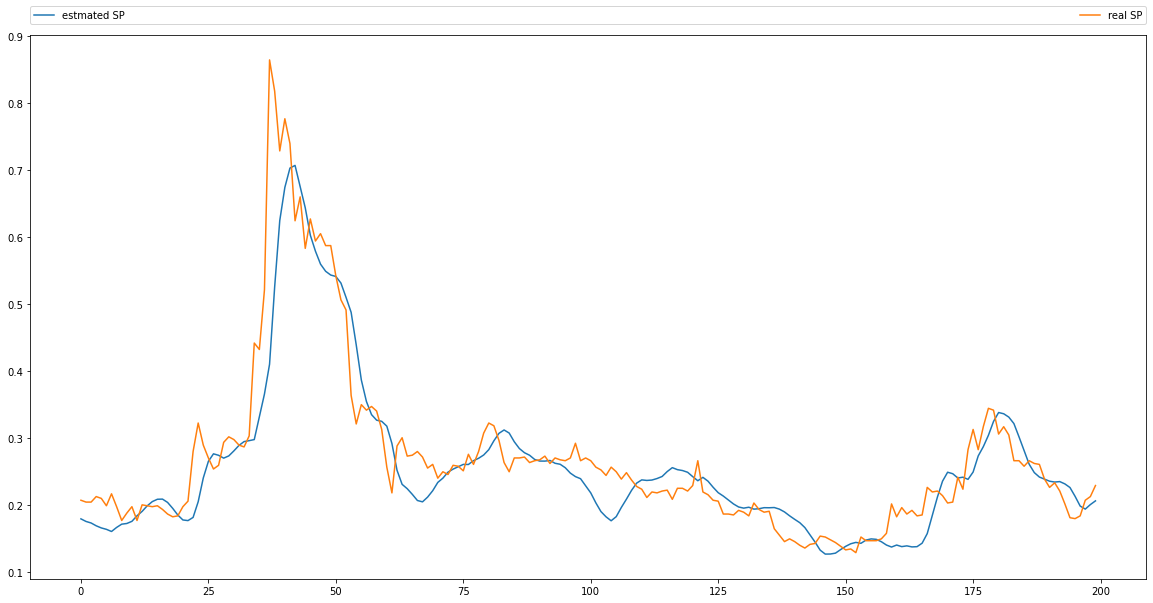

In [16]:
plt.plot(y_hat[:], label="estmated SP")
plt.plot(test_y[:], label="real SP")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [17]:
print("MAE:  ", mae(y_hat, test_y))
print("RMSE: ", rmse(y_hat, test_y))

MAE:   0.03319710200951423
RMSE:  0.05539799057734365
